<a href="https://colab.research.google.com/github/DavidS41/Li_DSPN_S25/blob/main/Li_DSPN_S25_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Willingness to Pay for Complementary Goods

David Li

# Background
Studying how consumers value goods has numerous practical applications for firms (e.g., price setting, marketing strategy, product offerings) and consumers (e.g., making optimal purchasing decisions). It is also crucial to improving our understanding of the preferences which underlie these observable choices and valuations. However, these observable behaviors (e.g., choice and valuation) are subject to biases or mistakes in that they are not consistent with assumptions about stable, rational preferences made for rational agents in classical economic models (e.g., Conlin et al., 2007; Hsee et al., 1999; Kahneman et al., 1991; Prelec & Loewenstein, 1998; Simonson, 1989).

In this project, we consider how the interdependencies between products (which can rationally impact how consumers utilize these products) impacts consumer willingness to pays for these products. Specifically, we study complementarity which refers to goods that have some additional value from joint (compared to separate) consumption, so consumers would prefer to consume them together at the same time (e.g., one might like to consume printers and ink at the same time, or cameras and SD cards, laptops and external monitors, etc.). The goal is to address two important issues:
1.   These interdependencies between goods are common in consumption with interrelated goods being presented in various forms on the market -- complements are often sold in isolation (e.g., capsule coffee machines and coffee pods or hotel reservations and flight tickets) or bundled together (e.g., a wireless keyboard and mouse, or software like Microsoft Word, PowerPoint, and Excel). Importantly, how these goods are presented on the market (together vs. separate) could affect the salience of their interdependences (Popkowski Leszczyc & Häubl, 2010) and consequently the value that consumers derive from these goods. Thus, studying how these relationships affect valuation could improve our understanding of market demand and consumer surplus or profits that could be extracted (based on how well sellers leverage these interdependencies).
2.   Also, this helps to address the methodological question of how to accurately capture consumer valuation of products. Valuation of goods and preferences have been studied in many ways, and one common method used to quantify these consumption values is willingness to pay (WTP); a substantial body of work has explored how to best measure WTP (e.g., Becker et al., 1964; Kahneman et al., 1990; Miller et al., 2011). One reason to prefer using WTP (over other methods) to quantify the value products provide to consumers is that it allows us to measure preferences in a way that is comparable across goods (Evangelidis et al., 2022). If it is the case that WTP elicits valuations that are comparable across goods, then we should also be able to construct and determine valuations of bundles in several ways (e.g., cumulative WTP for obtaining all components of the bundle in succession vs. for the entire bundle).

Then, the question arises of whether WTP for the same utility gain (of the bundle obtained additively in succession vs. altogether) are actually similar (i.e., do WTPs reflect these interdependencies between goods which affects their value when consumed altogether vs. conditional on having the other).



# Variables

The data was collected from participants on MTurk & Prolific in late April, early May 2024.

The key dependent variable (DV) was participants’ willingness to pay (WTP) for the (full or half) product they are presented with; WTP will be measured using 3 different elicitation methods to examine the robustness of the effect. Specifically, this study was a 3 (complement condition) x 3 (WTP elicitation) fully between-subjects design, with participants randomly assigned to one of the resulting 9 conditions.

Complement condition:
1.	WTP for (only) half of a perfect complement pair (shoes) when one does not (already) own either half
2.	WTP for (only) half of a perfect complement pair (shoes) when one does (already) own the other half
3.	WTP for the full perfect complement pair (shoes) when one does not (already) own either half

WTP elicitation:
1.	Standard WTP: Participants are (simply) asked for their WTP (by entering the value in a box).
2.	WTP-Sequential Explicit Zero Option: Participants are first asked if they are willing to pay a nonzero amount (yes/no). If they answer yes, then they are asked their WTP (by entering the value in a box).
3.	WTP-Simultaneous Explicit Zero Option: Participants are asked for their WTP (by entering the value in a box), and simultaneously presented with the option of selecting $0 (instead of entering a value).

Variables collected include:

*   **Duration_seconds**: Time to complete the survey in seconds.
*   **RecordedDate**: Date survey response was recorded.
*   **ResponseId**: Unique ID for each participant.
*   **consent_1-3**: Typical IRB consent questions.
*   **age**: Age
*   **gender**: Gender
*   **student**: Yes/No participant is currently a student
*   **education**: Highest level of education.
*   **personal_inc**: Personal income.
*   **household_inc**: Household income.
*   **ethnicity**: Ethnicity.
*   **taken_CLASSNAME**: Answers to a question where participants are asked to report what classes they have taken at the college level.
*   **YOB**: Year of birth.
*   **Attention 2_HOBBYNAME**: Answers to an attention check question; the correct choice is to answer only HOBBYNAME = Basketball & Biking.
*   **Which_Shoe**: Which image of a shoe was selected by the participant for them to imagine.
*   **WTPcond**: WTP elicitation condition, "Direct WTP" is asked their WTP directly, "2-step: Binary, then Direct WTP" is asked if they have nonzero WTP then to state their WTP (if it is nonzero), "Sync: Binary & Direct WTP" is asked to state their WTP with an explicit answer choice option to state 0.
*   **SFcond**: Complement condition, "0 to 0.5" is only offered one shoe with nothing, "0.5 to 1" is offered the other shoe given they already have one, "0 to 1" is offered both shoes.
*   **givenWTPforProduct**: Stated WTP
*   **explicitZero**: Dummy coded, 1 if participant selected the option choice in WTP question to answer a WTP of 0 (this option must have been offered, so participant must have been in condition **WTPcond** != "Direct WTP")
*   **saidZero**: Dummy coded, 1 if **givenWTPforProduct** == 0, 0 else.

# Hypotheses
Regardless of the relation between two goods (X and Y), the following statement should always be true: u(Y) + u(X | Y) = u(X & Y).

Assuming that WTP is a measure which accurately reflects u(), in the context of the above variables, it should be that WTP for those in condition "0.5 to 1" is not significantly different from those in "0 to 1". We hypothesize this is not true, specifically, we hypothesize that WTP for those in condition "0.5 to 1" (who state WTP to complete the pair) is less than those in "0 to 1" (who state WTP for the pair).

# Data Organization

Load in data.

**Data architecture**: Data is organized where each row is response data from a different participant and each column is a different response variable (as described above).

In [3]:
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
#system("pip install gdown")
system("gdown --id 1ik6fP3PXcQ8j82abxqJkPdMjUIaaa1Pt")
list.files()
d1 <- read.csv("project data.csv")
#head(d1)

[1] "LexicalData_toclean.csv" "project data.csv"       
[3] "sample_data"

**Data cleansing**:
*   Filter out those who do not consent
*   Filter out those who failed the attention checks: 1) did not ONLY select "Biking" and "Basketball", or 2) did not report a YOB consistent with their reported age
*   Filter out those who gave no WTP response
*   Collapse variables taken_CLASSNAME variables down into a dummy variable that is 1 if participants have taken a relevant (one that has to do with mathematics/economic reasoning) course at the collegiate level, and 0 else.
*   Make sure the variables used are in the correct form (e.g., stored as factor, numeric, etc.)
*   Make a copy of the data that only keeps the variables we are interested in (e.g., get rid of these columns that we filtered on, or other columns, that we definitely will not use as predictors).



In [8]:
#create a variable that returns TRUE if the YOB & age are lined up with +/- 1 year
d1$pass_age<-(d1$YOB + d1$age >= 2023) & (d1$YOB + d1$age <= 2025)
#colnames(d1[,24:35])
#first give it value TRUE if the two correct answers were selected
d1$pass_select_basketballbiking<-(d1$Attention.2...Basketball == "Basketball") & (d1$Attention.2...Biking == "Biking")

d1$taken_Related_Course<-(d1$taken_Economics == "Economics") | (d1$taken_Finance=="Finance")

#loop over and change from TRUE to FALSE, if more than just those 2 were selected
#(12 total choices, so change to FALSE if !=10 are not NA or blank)
#while looping, also perform the following:
#dummy code for those who have taken a related course (that might help them perform
#"better" (more rationally) at the task due to an advantage from being familiar with
# the economic concepts)
for (i in 1:dim(d1)[1]){
  count_blanks<-sum(d1[i,24:35]== ""|is.na(d1[i,24:35]))
  if (count_blanks !=10){
    d1$pass_select_basketballbiking[i]<-FALSE
  }else{
  }
  if (d1$taken_Related_Course[i]==TRUE){
  }else{
    d1$taken_Related_Course[i]<-FALSE
  }
}

d1_filtered<-d1%>%
  #filter those who don't consent
  filter(consent_1=="Yes" & consent_2=="Yes" & consent_1=="Yes")%>%
  #those who don't pass checks
  filter(pass_age==TRUE & pass_select_basketballbiking == TRUE)%>%
  #those who didn't respond to main DV
  filter(givenWTPforProduct!=""| !(is.na(givenWTPforProduct)))

colnames(d1_filtered)
drop_cols<-which(colnames(d1_filtered)%in%c("Duration_seconds","RecordedDate","consent_1","consent_2","consent_3",
"taken_Mathematics","taken_Statistics","taken_ProbabilityTheory","taken_Economics","taken_Finance",
"taken_ComputerScience","taken_Philosophy","taken_Ethics","taken_NONE",
"Attention.2...Biking","Attention.2...Fencing","Attention.2...Skiing","Attention.2...Writing",
"Attention.2...Reading","Attention.2...Video.gaming","Attention.2...Basketball","Attention.2...Shopping",
"Attention.2...Swimming","Attention.2...Computing","Attention.2...Football","Attention.2...None.of.the.above",
"pass_age","pass_select_basketballbiking"))

d2<-d1_filtered[,-drop_cols]

d2$gender<-factor(d2$gender)
d2$student<-factor(d2$student)
d2$education<-factor(d2$education)
d2$ethnicity<-factor(d2$ethnicity)
d2$Which_Shoe<-factor(d2$Which_Shoe)
d2$WTPcond<-factor(d2$WTPcond)
d2$SFCond<-factor(d2$SFCond)
d2$explicitZero<-factor(d2$explicitZero, levels = c(0, 1), labels = c("No", "Yes-said 0"))
d2$saidZero<-factor(d2$saidZero, levels = c(0, 1), labels = c("No", "Yes-explicit 0"))

[1] "Duration_seconds"                "RecordedDate"                   
 [3] "ResponseId"                      "consent_1"                      
 [5] "consent_2"                       "consent_3"                      
 [7] "age"                             "gender"                         
 [9] "student"                         "education"                      
[11] "personal_inc"                    "household_inc"                  
[13] "ethnicity"                       "taken_Mathematics"              
[15] "taken_Statistics"                "taken_ProbabilityTheory"        
[17] "taken_Economics"                 "taken_Finance"                  
[19] "taken_ComputerScience"           "taken_Philosophy"               
[21] "taken_Ethics"                    "taken_NONE"                     
[23] "YOB"                             "Attention.2...Biking"           
[25] "Attention.2...Fencing"           "Attention.2...Skiing"           
[27] "Attention.2...Writing"           "Attention.2...Reading"          
[29] "Attention.2...Video.gaming"      "Attention.2...Basketball"       
[31] "Attention.2...Shopping"          "Attention.2...Swimming"         
[33] "Attention.2...Computing"         "Attention.2...Football"         
[35] "Attention.2...None.of.the.above" "Which_Shoe"                     
[37] "WTPcond"                         "SFCond"                         
[39] "givenWTPforProduct"              "explicitZero"                   
[41] "saidZero"                        "pass_age"                       
[43] "pass_select_basketballbiking"    "taken_Related_Course"

**Resulting (Cleaned/Tidied) Data Table**:

In [9]:
head(d2)

,ResponseId,age,gender,student,education,personal_inc,household_inc,ethnicity,YOB,Which_Shoe,WTPcond,SFCond,givenWTPforProduct,explicitZero,saidZero,taken_Related_Course
,<chr>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<lgl>
1,R_5Iv0EM5OX5NJmfz,28,Female,No,"Graduate degree, Masters",55000,120000,Hispanic/Latino,1995,1,Sync: Binary & Direct WTP,0 to 1,90,No,No,FALSE
2,R_3XdszphbDcA4sYt,33,Female,No,"Graduate degree, Masters",25000,50000,Caucasian/White,1991,1,Direct WTP,0.5 to 1,45,No,No,TRUE
3,R_5CP2yxyJpSuV89b,31,Male,No,High school,1000,20000,Caucasian/White,1992,4,"2-step: Binary, then Direct WTP",0 to 0.5,0,Yes-said 0,Yes-explicit 0,FALSE
4,R_1KZLJK38eK1NDmN,37,Male,Yes,Some college or university,25000,30000,Caucasian/White,1986,4,Sync: Binary & Direct WTP,0 to 0.5,0,Yes-said 0,Yes-explicit 0,FALSE
5,R_5FgN5Et3r9RC2pQ,52,Female,No,"Graduate degree, Masters",100000,250000,Caucasian/White,1972,2,"2-step: Binary, then Direct WTP",0 to 1,125,No,No,FALSE
6,R_2VpFhXbge1zWT9a,26,Male,Yes,"Graduate degree, Masters",75000,75000,Caucasian/White,1997,4,Sync: Binary & Direct WTP,0 to 0.5,0,Yes-said 0,Yes-explicit 0,FALSE


# Analysis

**Initial Visualization**

Plots to explore how WTPs in complement condition 0.5 to 1 compares to those in 0 to 1 condition and how it relates to some demographic variables (e.g., incomes).

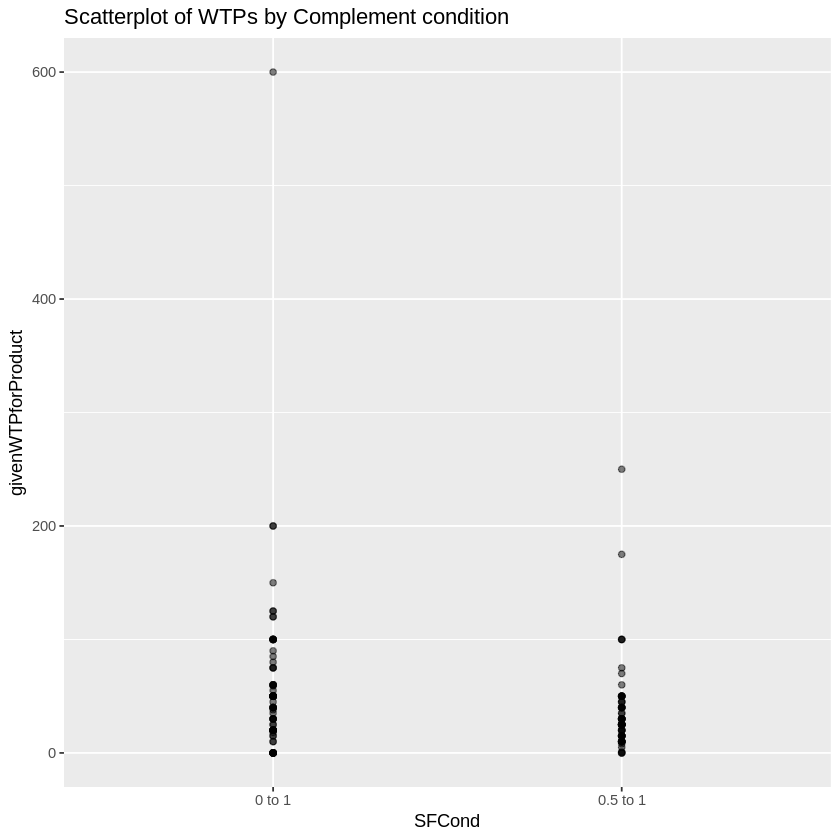

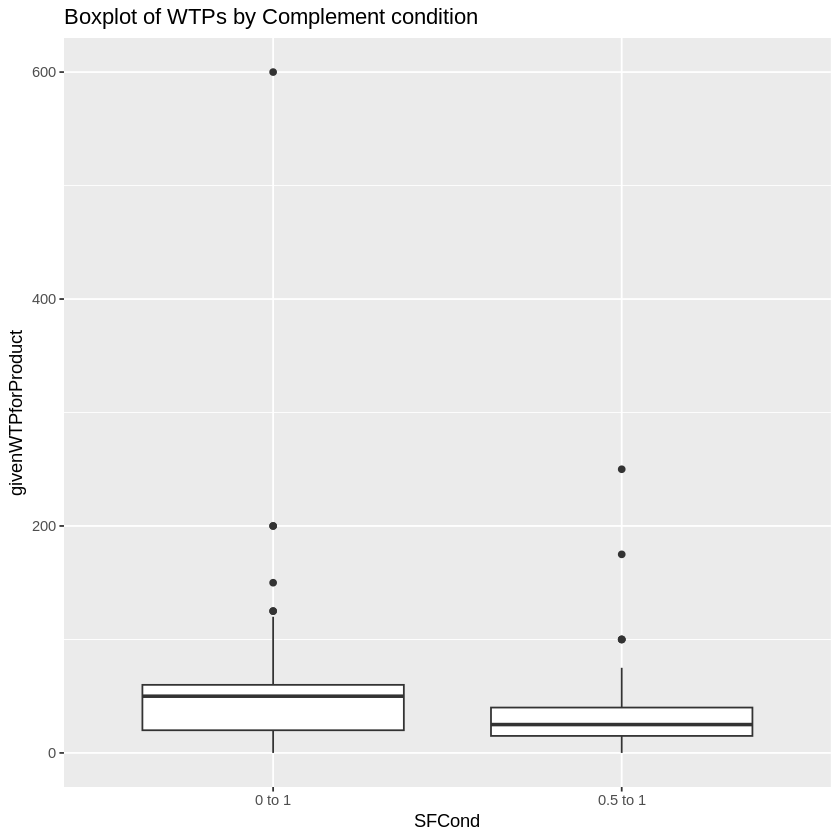

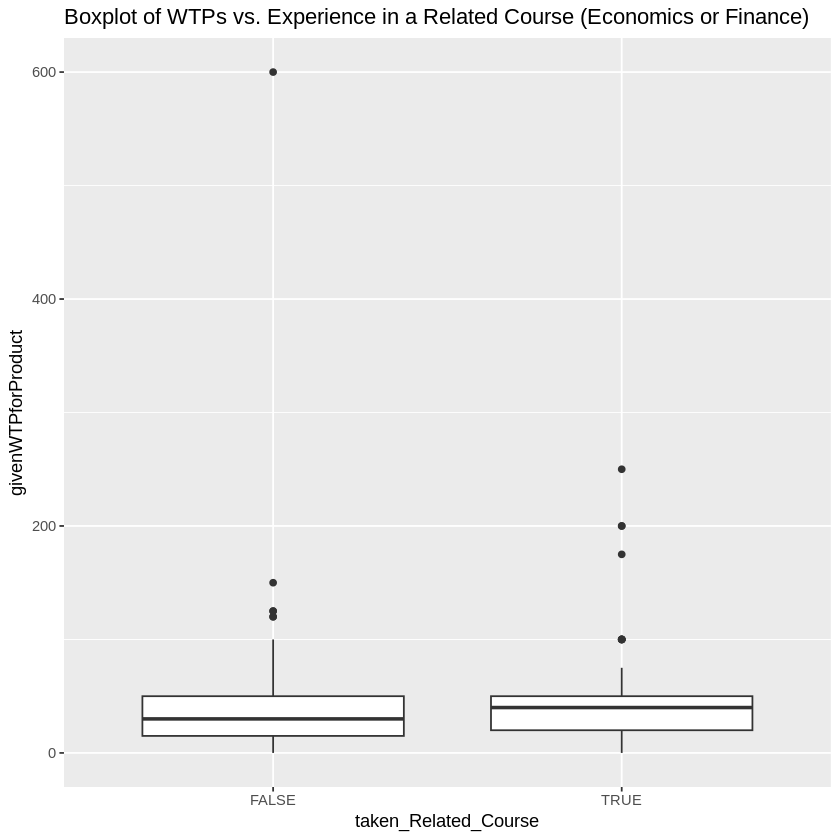

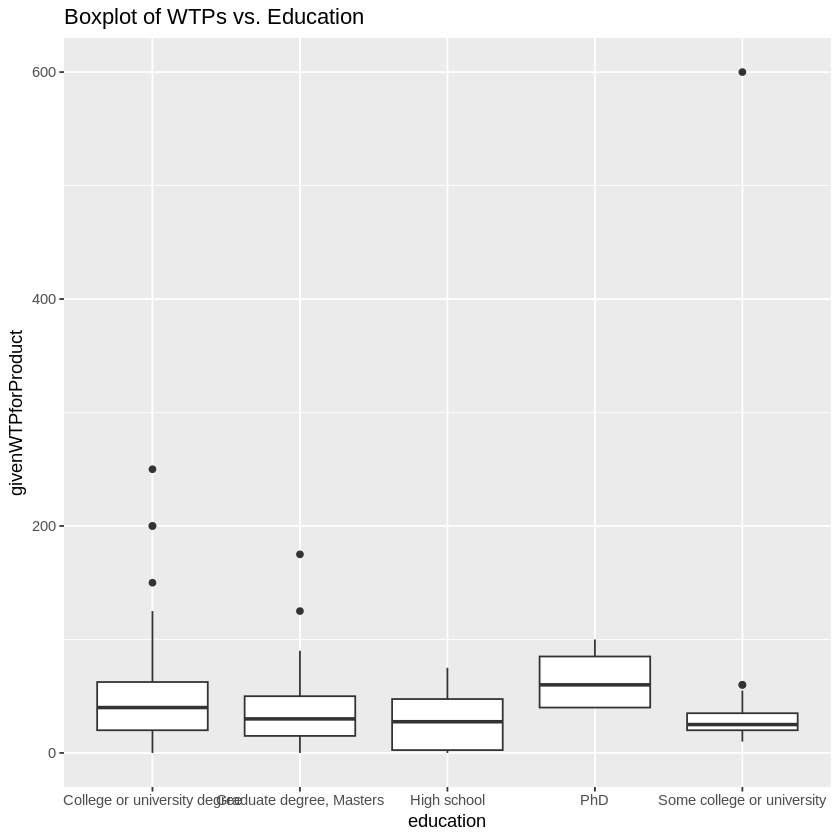

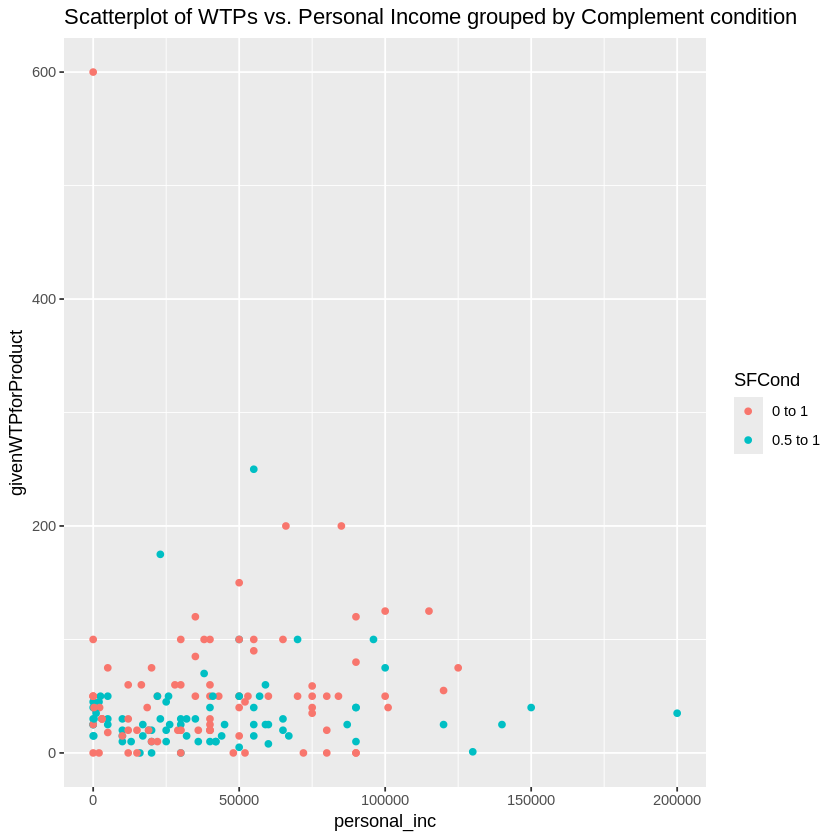

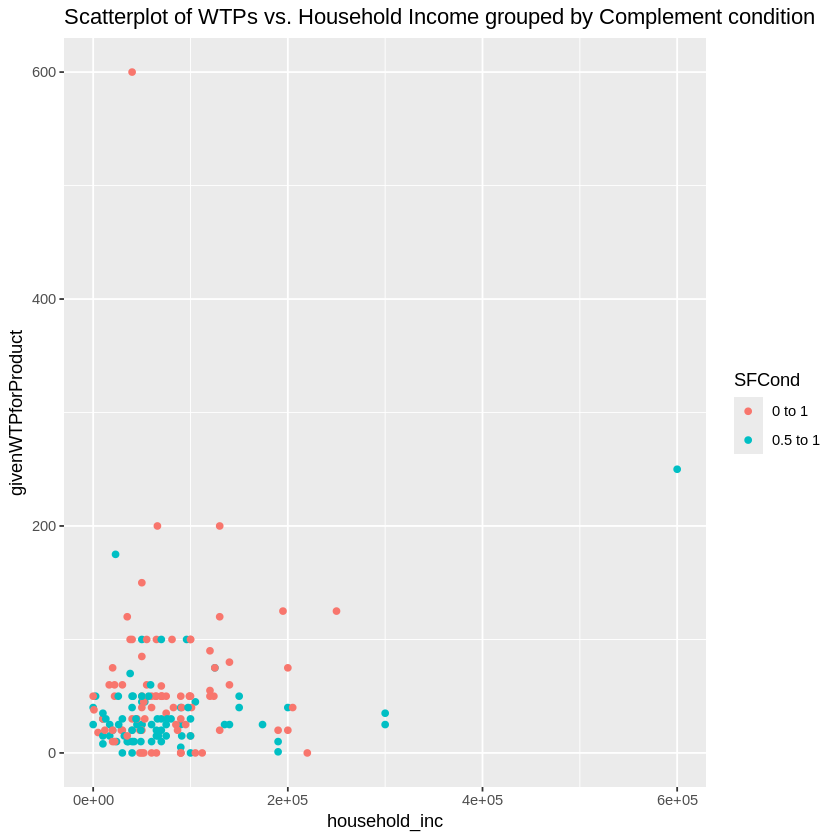

In [10]:
d2%>%
  filter(SFCond!="0 to 0.5")%>%
  ggplot(aes(x = SFCond, y = givenWTPforProduct))+
  geom_point(alpha=0.5)+
  labs(title = "Scatterplot of WTPs by Complement condition")

d2%>%
  filter(SFCond!="0 to 0.5")%>%
  ggplot(aes(x = SFCond, y = givenWTPforProduct))+
  geom_boxplot()+
  labs(title = "Boxplot of WTPs by Complement condition")

d2%>%
  filter(SFCond!="0 to 0.5")%>%
  ggplot(aes(x = taken_Related_Course, y = givenWTPforProduct))+
  geom_boxplot()+
  labs(title = "Boxplot of WTPs vs. Experience in a Related Course (Economics or Finance)")

d2%>%
  filter(SFCond!="0 to 0.5")%>%
  ggplot(aes(x = education, y = givenWTPforProduct))+
  geom_boxplot()+
  labs(title = "Boxplot of WTPs vs. Education")

d2%>%
  filter(SFCond!="0 to 0.5")%>%
  ggplot(aes(x = personal_inc, y = givenWTPforProduct, color = SFCond))+
  geom_point()+
  labs(title = "Scatterplot of WTPs vs. Personal Income grouped by Complement condition")

d2%>%
  filter(SFCond!="0 to 0.5")%>%
  ggplot(aes(x = household_inc, y = givenWTPforProduct, color = SFCond))+
  geom_point()+
  labs(title = "Scatterplot of WTPs vs. Household Income grouped by Complement condition")

**Linear Regression**

Note that since we are only interested in how the WTPs in the two conditions: 0.5 to 1 and 0 to 1 compare (in these analyses), we will used a restricted dataset that filters out the irrelevant responses.

We start with a linear regression of the response (stated WTP) on the IV (the complement condition) which gives results which can be interpreted similarly to a t-test.

In [11]:
d2_relevant <- d2%>%
  filter(SFCond!="0 to 0.5")

lin_model_onlyMainCondition<-lm(givenWTPforProduct~ SFCond,d2_relevant)
summary(lin_model_onlyMainCondition)


Call:
lm(formula = givenWTPforProduct ~ SFCond, data = d2_relevant)

Residuals:
   Min     1Q Median     3Q    Max 
-56.09 -24.79  -9.79   5.21 543.91 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      56.092      6.262   8.958 7.84e-16 ***
SFCond0.5 to 1  -21.302      9.171  -2.323   0.0214 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.41 on 161 degrees of freedom
Multiple R-squared:  0.03243,	Adjusted R-squared:  0.02642 
F-statistic: 5.396 on 1 and 161 DF,  p-value: 0.02144


Only putting in variables that might reasonably be expected to influence DV (based on theory/hypothesis/design): income (the more you earn, the more you may be willing to pay), complement condition (related to our hypothesis), WTP elicitation condition (prior research suggests explicit 0 option may encourage lower average WTP response), and whether or not one has taken a related course (if one is familiar with the concept of perfect complements and the rational agent model, they may be more likely to state different WTP that doesn't show the predicted bias).

In [12]:
lin_model_theory<-lm(givenWTPforProduct~ personal_inc+household_inc+WTPcond+SFCond+taken_Related_Course,d2_relevant)
summary(lin_model_theory)


Call:
lm(formula = givenWTPforProduct ~ personal_inc + household_inc + 
    WTPcond + SFCond + taken_Related_Course, data = d2_relevant)

Residuals:
   Min     1Q Median     3Q    Max 
-69.99 -28.27  -5.81  12.06 528.83 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)                       3.157e+01  1.140e+01   2.769  0.00631 **
personal_inc                     -3.881e-05  1.480e-04  -0.262  0.79352   
household_inc                     1.772e-04  7.668e-05   2.310  0.02218 * 
WTPcondDirect WTP                 3.251e+01  1.115e+01   2.915  0.00408 **
WTPcondSync: Binary & Direct WTP  1.210e+01  1.078e+01   1.123  0.26321   
SFCond0.5 to 1                   -2.074e+01  8.921e+00  -2.325  0.02135 * 
taken_Related_CourseTRUE         -4.648e+00  9.361e+00  -0.496  0.62025   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56.72 on 156 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R

Throwing (pretty much) all the variables into the linear regression (note, not including random effects from participant ID, or repeat info like varaibles saidZero or explicitZero):

In [13]:
lin_model<-lm(givenWTPforProduct~ age+gender+student+education+personal_inc+household_inc+ethnicity+Which_Shoe+WTPcond+SFCond+taken_Related_Course,d2_relevant)
summary(lin_model)


Call:
lm(formula = givenWTPforProduct ~ age + gender + student + education + 
    personal_inc + household_inc + ethnicity + Which_Shoe + WTPcond + 
    SFCond + taken_Related_Course, data = d2_relevant)

Residuals:
   Min     1Q Median     3Q    Max 
-98.33 -28.72  -4.97  20.49 426.81 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          4.495e+01  2.574e+01
age                                                 -3.495e-01  3.545e-01
genderMale                                           2.697e+00  1.063e+01
genderOther / Prefer not to answer                  -2.575e+01  2.968e+01
studentYes                                           7.480e+01  1.982e+01
educationGraduate degree, Masters                   -1.991e+01  1.229e+01
educationHigh school                                -1.556e+01  1.625e+01
educationPhD                                         5.211e+00  3.091e+01
educationSome college or unive

In all these models, controlling for different subsets of other demographic varaibles & variables we manipulated in the study between subjects (the WTP elicitation), it appears that the coefficient on SFCond remains statistically significant suggesting that the effect of the Complement Condition (0.5 to 1 vs. 0 to 1) on participant's reported WTP may be significant.

**Permutation Test**

We may want to also perform a permutation test (as opposed to relying on assumptions of normality in parametric test) to assess the effect of the complement condition on WTP.

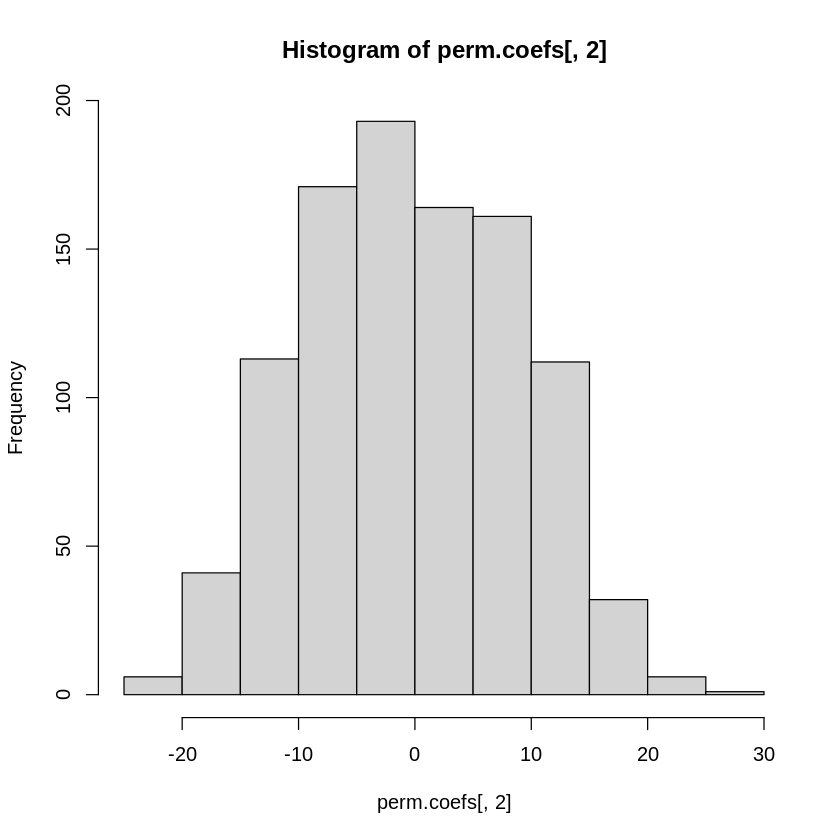

In [14]:
#set seed
set.seed(55704)

# copy of the data for permutation
perm_d2 <- d2_relevant

# Set the number of iterations
R<-1000

# Output object for storing result
perm.coefs=matrix(NA,nrow=R, ncol=2)

# Scramble observations and calculate regression coefficient estimates
for (i in 1:R){
  perm_d2$SFCond=d2_relevant$SFCond[sample(dim(d2_relevant)[1])] # shuffled complement condition vector
  perm.coefs[i,]=coef(lm(givenWTPforProduct~SFCond, perm_d2)) # then we get coefficients for linear model of shuffled horsepower to auto
}

# Take a look at the null distributions
hist(perm.coefs[,2])

In [15]:
# Re-estimate the real (unpermuted) effect of Complement condition on WTP
perm.real = coef(lm(givenWTPforProduct~SFCond, d2_relevant))
perm.real

#calculate p-value of permuation test
perm.p = sum(perm.coefs[,2]<perm.real[2])/R
perm.p

(Intercept) SFCond0.5 to 1 
      56.09195      -21.30248

[1] 0.003

Recalculate p-value when controlling for other variables that (theoretically may) matter.

(Intercept)                   SFCond0.5 to 1 
                    3.157207e+01                    -2.074348e+01 
                    personal_inc                    household_inc 
                   -3.880678e-05                     1.771615e-04 
               WTPcondDirect WTP WTPcondSync: Binary & Direct WTP 
                    3.251203e+01                     1.210022e+01 
        taken_Related_CourseTRUE 
                   -4.647517e+00

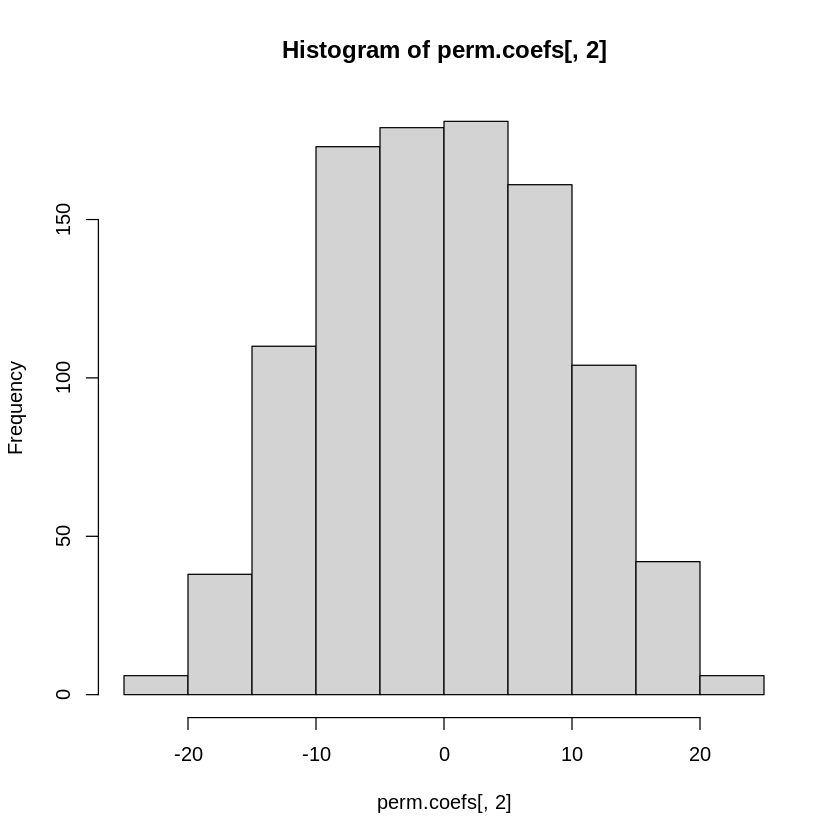

In [18]:
#set seed
set.seed(45163)

perm_d2 <- d2_relevant
R<-1000
perm.coefs=matrix(NA,nrow=R, ncol=7)

for (i in 1:R){
  perm_d2$SFCond=d2_relevant$SFCond[sample(dim(d2_relevant)[1])] # shuffled complement condition vector
  perm.coefs[i,]=coef(lm(givenWTPforProduct~ SFCond+personal_inc+household_inc+WTPcond+taken_Related_Course, perm_d2)) # then we get coefficients for linear model of shuffled horsepower to auto
}

# Take a look at the null distributions
hist(perm.coefs[,2])

In [28]:
perm.real = coef(lm(givenWTPforProduct~ SFCond+personal_inc+household_inc+WTPcond+taken_Related_Course,d2_relevant))
perm.real

#calculate p-value of permuation test
perm.p = sum(perm.coefs[,2]<perm.real[2])/R
perm.p

(Intercept)                   SFCond0.5 to 1 
                    3.157207e+01                    -2.074348e+01 
                    personal_inc                    household_inc 
                   -3.880678e-05                     1.771615e-04 
               WTPcondDirect WTP WTPcondSync: Binary & Direct WTP 
                    3.251203e+01                     1.210022e+01 
        taken_Related_CourseTRUE 
                   -4.647517e+00

[1] 0.004

These non-parametric permutation tests again (when controlling for different subsets of variables -- testing if the coefficient is signficantly different from 0 when controlling for the effect of other theoretically related variables and not), it appears that the coefficient on SFCond remains statistically significant. This corroborates the results from the parametric test, again suggesting that the effect of the Complement Condition (0.5 to 1 vs. 0 to 1) on participant's reported WTP may be significant.

**Bootstrapping**

Generate confidence intervals for our estimates (again for our model which we've paired down based on our theoretical predictions)

In [33]:
#install.packages("ISLR")
library(ISLR)
library(boot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d2_relevant, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1*  3.157207e+01  1.955622e+00 1.292492e+01
t2* -2.074348e+01 -8.051966e-01 8.427264e+00
t3* -3.880678e-05  4.671099e-05 1.772590e-04
t4*  1.771615e-04 -4.594656e-05 1.259252e-04
t5*  3.251203e+01 -8.576759e-01 1.301333e+01
t6*  1.210022e+01 -3.659962e-01 6.935691e+00
t7* -4.647517e+00  5.083301e-01 8.508291e+00


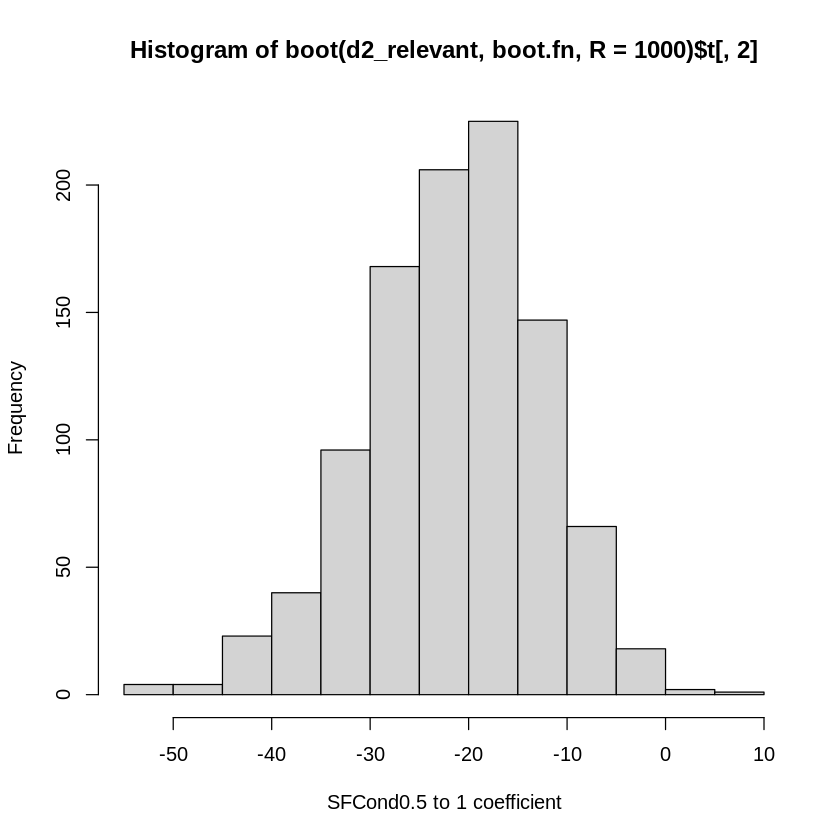

In [35]:
set.seed(11876)

boot.fn <- function(data, index){
    # coef: extract coefficients from model object
    return(coef(lm(givenWTPforProduct~ SFCond+personal_inc+household_inc+WTPcond+taken_Related_Course , data=data, subset=index)))
}

#sanity check
#print(boot.fn(d2_relevant, 1:dim(d2_relevant)[1]))

boot_obj = boot(d2_relevant, boot.fn ,R=1000) #R=repetitions
print(boot_obj)

hist(boot(d2_relevant ,boot.fn ,R=1000)$t[,2], xlab="SFCond0.5 to 1 coefficient")

In the above bootstrap object table, note that:
*   t1: (Intercept)
*   t2: SFCond0.5 to 1
*   t3: personal_inc
*   t4: household_inc
*   t5: WTPcondDirect WTP
*   t6: WTPcondSync: Binary & Direct WTP
*   t7: taken_Related_CourseTRUE

From the histogram and reported boostrap results, we can see that it appears that the bootstrap resampled/simulated distribution of parameter estimates for the effect of Complement condition on participant's WTP is nonzero.

**Model Selection**:

We may wonder, if we were to use model selection on all the possible variables to predict the reported WTP, what variables would be selected to be included in the regression. The following are results from forwards and backwards selection.

In [69]:
d3 <- d2_relevant[,-c(1,9,14,15)]
d3$SFCond <- factor(d3$SFCond)
dim(d3)[2]

[1] 12

In [68]:
#install.packages("leaps")
library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [90]:
regfit.full = regsubsets(givenWTPforProduct~., d3, nvmax=20) #< "nvmax" allows the model selection to include up to 19 variables (limited to 8 by default)
reg.summary = summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(givenWTPforProduct ~ ., d3, nvmax = 20)
24 Variables  (and intercept)
                                                    Forced in Forced out
age                                                     FALSE      FALSE
genderMale                                              FALSE      FALSE
genderOther / Prefer not to answer                      FALSE      FALSE
studentYes                                              FALSE      FALSE
educationGraduate degree, Masters                       FALSE      FALSE
educationHigh school                                    FALSE      FALSE
educationPhD                                            FALSE      FALSE
educationSome college or university                     FALSE      FALSE
personal_inc                                            FALSE      FALSE
household_inc                                           FALSE      FALSE
ethnicityAmerican Indian/Alaska Native                  FALSE      FALSE
ethni

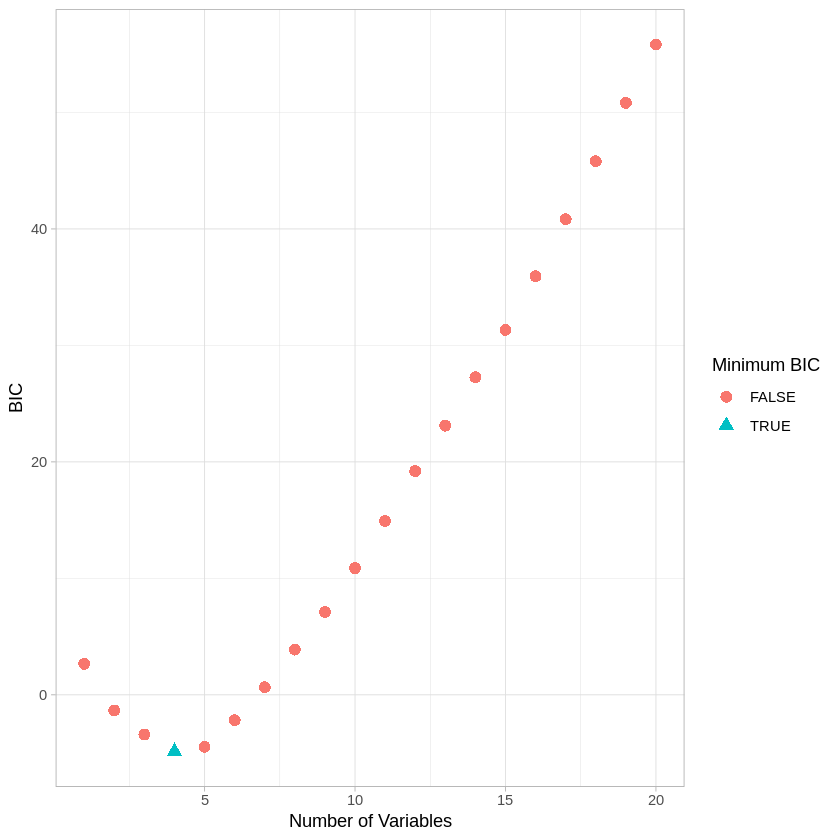

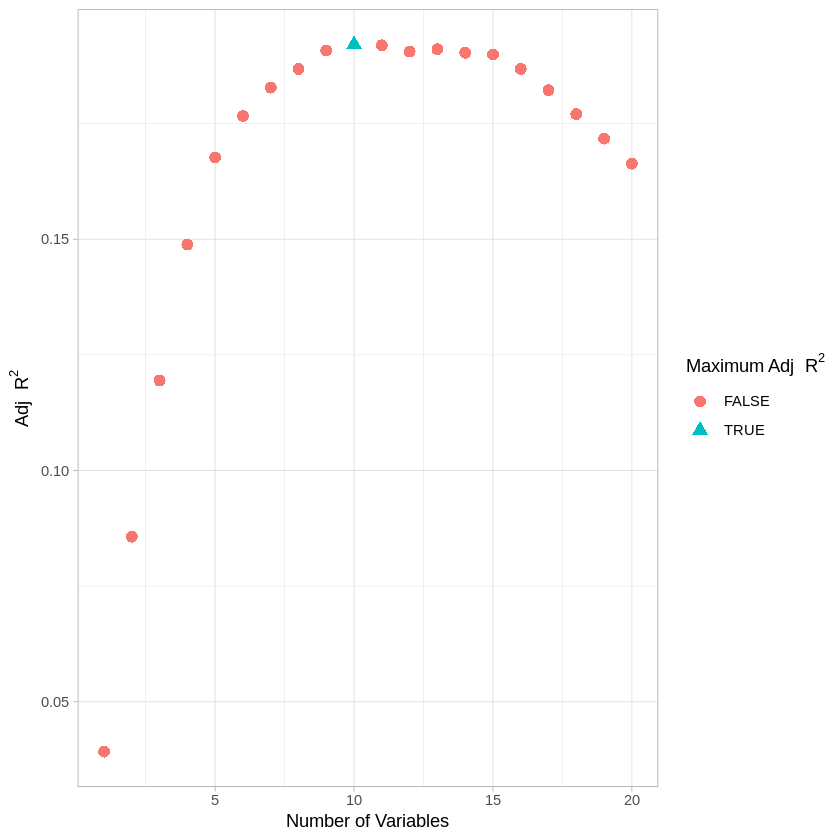

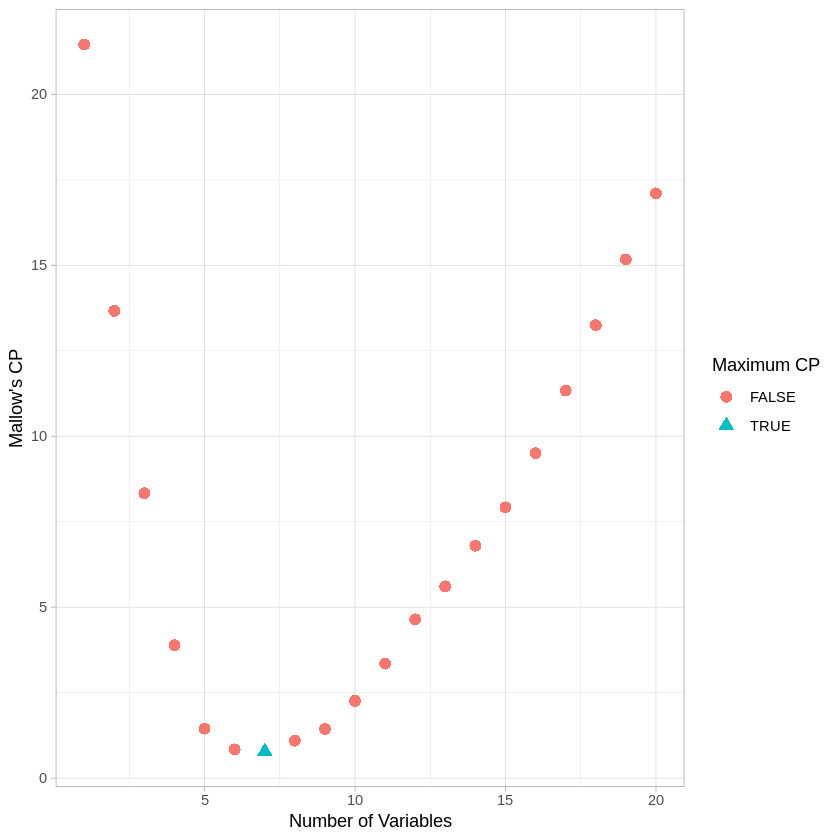

In [89]:
numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19.
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

In [85]:
cat("Number of variables which minimizes BIC: ", which.min(reg.summary$bic) , "\n")
cat("Number of variables which minimizes Adj R^2: ",which.max(reg.summary$adjr2), "\n")
cat("Number of variables which minimizes Mallow's CP: ",which.min(reg.summary$cp), "\n")

Number of variables which minimizes BIC:  4 
Number of variables which minimizes Adj R^2:  10 
Number of variables which minimizes Mallow's CP:  7 


In [86]:
#whole table for the ones that max the above measures
reg.summary$which[c(4,10,7),]

,(Intercept),age,genderMale,genderOther / Prefer not to answer,studentYes,"educationGraduate degree, Masters",educationHigh school,educationPhD,educationSome college or university,personal_inc,⋯,ethnicityOther,Which_Shoe2,Which_Shoe3,Which_Shoe4,Which_Shoe5,Which_Shoe6,WTPcondDirect WTP,WTPcondSync: Binary & Direct WTP,SFCond0.5 to 1,taken_Related_CourseTRUE
4,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
10,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE
7,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE


Simplified summary table for which are included. If the variable is not included at all in the table below, it was not included in any of the chosen/selected models (all entries for that column/variable were FALSE).

In [87]:
#initialize empty vector
to_drop<-c()
#store those columns for which all are FALSE
for (i in 1:dim(reg.summary$which)[2]){
  hold_sum<-sum(reg.summary$which[c(4,10,7),i])
  if(hold_sum==0){
    to_drop<-c(to_drop,i)
  }else{
  }
}

reg.summary$which[c(4,10,7),-to_drop]

,(Intercept),studentYes,"educationGraduate degree, Masters",household_inc,"ethnicityAsian, Asian-American, or Pacific Islander",ethnicityCaucasian/White,Which_Shoe4,Which_Shoe5,WTPcondDirect WTP,WTPcondSync: Binary & Direct WTP,SFCond0.5 to 1
4,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
7,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE


We see from the results of running model selection that in any model selected from minimizing the model fit metrics: BIC, Adjusted R^2, and Mallow's CP (which punish complexity), the Complement Condition variable is included/selected.

**Regularized Regression**:

Further, along the lines of model selection/simplification, we consider the results of Ridge and LASSO regression below.

Ridge regression results:

In [36]:
#install.packages("glmnet", dependencies = TRUE)
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘lars’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



Best lambda:  169.1183 
MSE for ridge regression with best lambda:  4057.693 
25 x 1 sparse Matrix of class "dgCMatrix"
                                                               s1
(Intercept)                                          4.579481e+01
age                                                 -1.443210e-01
genderMale                                           3.083973e-02
genderOther / Prefer not to answer                  -5.437602e+00
studentYes                                           1.465147e+01
educationGraduate degree, Masters                   -4.605630e+00
educationHigh school                                -2.562160e+00
educationPhD                                         5.524166e-01
educationSome college or university                  2.808660e+00
personal_inc                                         1.461499e-06
household_inc                                        3.894422e-05
ethnicityAmerican Indian/Alaska Native              -8.231910e+00
ethnicityAsian, Asian-

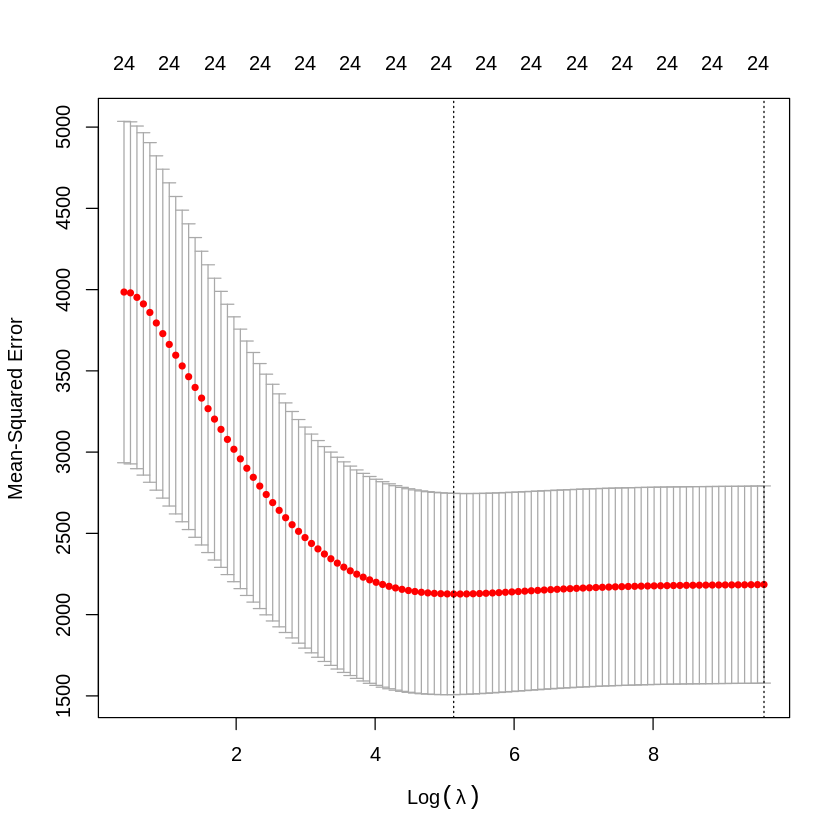

In [66]:
set.seed(86670)

lambda_search_space = 10^seq(10, -2, length=100)
x = model.matrix(givenWTPforProduct~., d3)[,-1]
y = d3$givenWTPforProduct[!(is.na(d3$givenWTPforProduct))]

train=sample(1:nrow(x), nrow(x)/2) #50/50 split into training and test sets
test=(-train) #get test indices (not training indices)

#split each of the training and test phases into two
train_hyperparameter = sample(train, length(train)/2)
train_glm = (-train_hyperparameter)

test_hyperparameter = sample(test, length(test)/2)
test_glm = (-test_hyperparameter)

cv.out = cv.glmnet(x[train_hyperparameter,], y[train_hyperparameter], alpha=0)
plot(cv.out) #defaults to 10-fold CV
bestlam = cv.out$lambda.min
cat("Best lambda: ",bestlam, "\n")

ridge.mod = glmnet(x[train,], y[train], alpha=0, lambda=lambda_search_space, thresh=1e-12)
ridge.pred = predict(ridge.mod, s=bestlam, newx=x[test_hyperparameter,])
cat("MSE for ridge regression with best lambda: ", mean((ridge.pred -y[test_hyperparameter])^2) , "\n")

out = glmnet(x[train_glm,],y[train_glm], alpha=0)
print(predict(out, type="coefficients", s=bestlam, newx=x[test_glm,]))

Lasso Regression Results:

Best lambda:  14.70905 
MSE for LASSO regression with best lambda:  4176.235 
25 x 1 sparse Matrix of class "dgCMatrix"
                                                          s1
(Intercept)                                         44.47967
age                                                  .      
genderMale                                           .      
genderOther / Prefer not to answer                   .      
studentYes                                           .      
educationGraduate degree, Masters                    .      
educationHigh school                                 .      
educationPhD                                         .      
educationSome college or university                  .      
personal_inc                                         .      
household_inc                                        .      
ethnicityAmerican Indian/Alaska Native               .      
ethnicityAsian, Asian-American, or Pacific Islander  .      
ethnicityCaucasian/White  

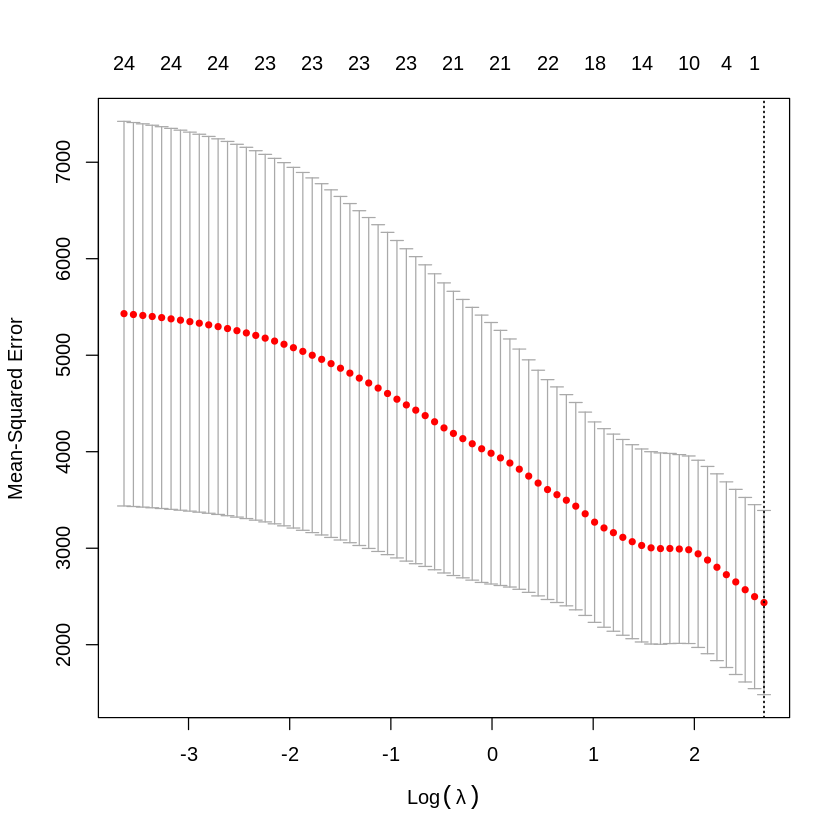

In [67]:
set.seed(80949)

cv.out = cv.glmnet(x[train_hyperparameter,], y[train_hyperparameter], alpha=1)
plot(cv.out) #defaults to 10-fold CV
bestlam = cv.out$lambda.min
cat("Best lambda: ",bestlam, "\n")

ridge.mod = glmnet(x[train,], y[train], alpha=1, lambda=lambda_search_space, thresh=1e-12)
ridge.pred = predict(ridge.mod, s=bestlam, newx=x[test_hyperparameter,])
cat("MSE for LASSO regression with best lambda: ", mean((ridge.pred -y[test_hyperparameter])^2) , "\n")

out = glmnet(x[train_glm,],y[train_glm], alpha=1)
print(predict(out, type="coefficients", s=bestlam, newx=x[test_glm,]))

Contrary to the previous results, we see here that when we use ridge regression, the parameter estimate for Complement Condition (SFCond) is forced to near 0, and that the estimate is actually forced to 0 when we used LASSO regression (although everything is forced to 0 except for the intercept term when we use this regularization technique).

# Conclusion

In conclusion, we tested the hypothesis that individuals who evaluated obtaining a single shoe to complete the pair (complement condition 0.5 to 1) had a significantly different and lower willingness to pay than those who evaluated (stated their WTP for) the opportunity to obtain both shoes/the entire pair (complement condition 0 to 1). Despite our finding that when using regularization techniques, pretty much only the intercept would be selected (or not pushed to a near 0 parameter estimate), through regression results, we controlled for the effect of other demographic variables and found that the impact of complement condition 0.5 to 1 was statistically signficant and less than 0 (suggesting that WTP in this condition was lower than in the 0 to 1 condition). We also used non-parametric permutation test to test this and again found that the difference was significantly different than 0. Further, using bootstrap resampling methods, we generated a simulated distirbution of the parameter estimates and saw that it did not include 0. Then, when using model selection techniques, we saw that the complement condition was selected as an important variable for inclusion when using model selection methods and evaluating the fit of the model using criterion which punished model complexity.

Based on these findings, it suggests that WTP to complete perfect complement pairs may be less that WTP to obtain the entire pair despite the fact that utility gains from both these transactions should be the same (i.e., the ability to wear/use the pair of shoes). Some limitations to these results to consider are that: the stimuli we used are shoes which are perfect complements, but these halves are not usually sold independently in markets which may have made the scenario come across as very odd and an aversion to purchasing such "weird" products may have influenced our result. Further, it's important to keep in mind that our method of eliciting valuations is WTP. This means that one should be cautious in saying that people are truly making a mistake in valuing these items (i.e., it may not be the case that people can't recognize that these two transaction should be equally valuable to them, instead it may be the case that there is something unqiue to their understanding/response to WTP elicitation mechanisms which leads them to respond in a way such that their WTP is seperated from their true valuation/utility gain of the product.)